In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

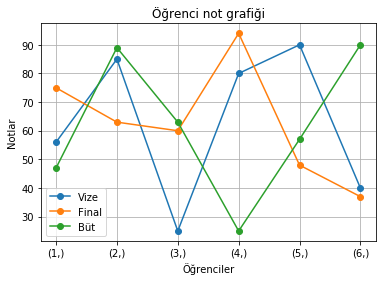

,Vize,Final,Büt
1,56,75,47
2,85,63,89
3,25,60,63
4,80,94,25
5,90,48,57
6,40,37,90


In [7]:
notlar = pd.DataFrame({"Vize":[56,85,25,80,90,40],
                        "Final":[75,63,60,94,48,37],
                        "Büt":[47,89,63,25,57,90]},index=[np.arange(1,7)])
ax1 = notlar.plot(marker='o')
fig = ax1.get_figure()
plt.grid(True)
plt.title("Öğrenci not grafiği")
plt.xlabel("Öğrenciler")
plt.ylabel("Notlar")
plt.show();



# fig.savefig(r"C:\Users\tahay\Desktop\notfig.png")
#--------------------------------------------------------
# ax= plt.subplot(111, frame_on=False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# ax.set_title("Alınan Notlar")
# table(ax,notlar,loc ='upper center',);
# plt.savefig(r"C:\Users\tahay\desktop\nottable.png")
#--------------------------------------------------------
notlar

In [8]:
X = pd.DataFrame({"Vize":[59],"Final":[32],"Büt":["?"]},index=[1])
X

,Vize,Final,Büt
1,59,32,?


In [9]:
vize_fark_karesi = [] # çıktıları tutabileceğimiz boş bir liste tanımladık
for q in notlar["Vize"]: # notlar tablosunda vize notlarının üzerinde tek tek gezinecek.
    for p in X["Vize"]: # X'in vize notunu alacak.
        vize_fark_karesi.append((p-q)**2) # append diyerek boş listemize hesaplanan işlemi ekledik 
vize_fark_karesi = pd.DataFrame(vize_fark_karesi,columns=["Vize_fark_kareleri"],index=[np.arange(1,7)])
#DataFrame haline getirdik.

vize_fark_karesi

,Vize_fark_kareleri
1,9
2,676
3,1156
4,441
5,961
6,361


In [10]:
final_fark_karesi=[] # çıktıları tutabileceğimiz boş bir liste tanımladık
for q in notlar["Final"]: # notlar tablosunda final notlarının üzerinde tek tek gezinecek.
    for p in X["Final"]: # X'in final notunu alacak.
        final_fark_karesi.append((p-q)**2) # append diyerek boş listemize hesaplanan işlemi ekledik 
final_fark_karesi = pd.DataFrame(final_fark_karesi,columns=["Final_fark_kareleri"],index=[np.arange(1,7)])
# DataFrame haline getirdik.

final_fark_karesi

,Final_fark_kareleri
1,1849
2,961
3,784
4,3844
5,256
6,25


In [11]:
df = pd.concat([vize_fark_karesi,final_fark_karesi],axis=1)

In [12]:
df["kareler_toplamı"] = df["Vize_fark_kareleri"]+df["Final_fark_kareleri"]

df

,Vize_fark_kareleri,Final_fark_kareleri,kareler_toplamı
1,9,1849,1858
2,676,961,1637
3,1156,784,1940
4,441,3844,4285
5,961,256,1217
6,361,25,386


In [13]:
df["Kareler_toplamı_karekökü"] = np.sqrt(df["kareler_toplamı"])

df

,Vize_fark_kareleri,Final_fark_kareleri,kareler_toplamı,Kareler_toplamı_karekökü
1,9,1849,1858,43.104524
2,676,961,1637,40.459857
3,1156,784,1940,44.045431
4,441,3844,4285,65.459911
5,961,256,1217,34.885527
6,361,25,386,19.646883


In [97]:
k =int(input('K degerini(Komşu) girin:'))
indexler =df.nsmallest(n=k,columns='Kareler_toplamı_karekökü').index
tahmin =np.sum(notlar["Büt"].loc[indexler])/k
print("X öğencisinin tahmini büt puanı:",tahmin)

K degerini(Komşu) girin:3
X öğencisinin tahmini büt puanı: 78.66666666666667


iloc ile varsayılan index ile ilem yapar.01,1,2... şeklinde loc ise bizim tanumladığımız index ile işlem yapar.'ali','veli' gibi